<a href="https://colab.research.google.com/github/GV-A/Zomato-data-analysis/blob/main/Zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


First we have to convert the data type of rate to float value, removing the denominator.

In [ ]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
#summary of the data frame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
#examine the data frame for the presence of any null values
dataframe.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


There is no null value in the data frame

Text(0.5, 0, 'Type of restaurant')

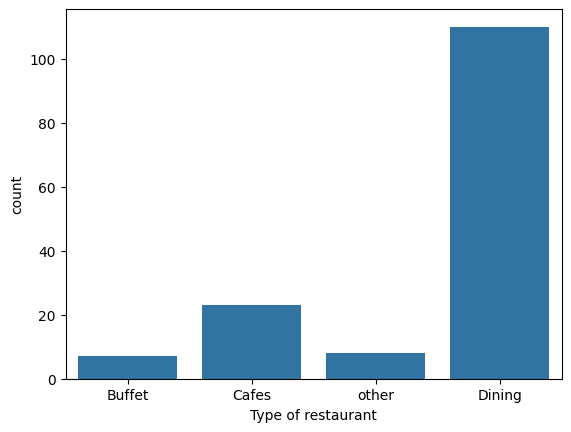

In [ ]:
#visualizing the listed_in(type) column
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


**CONCLUSION**: The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

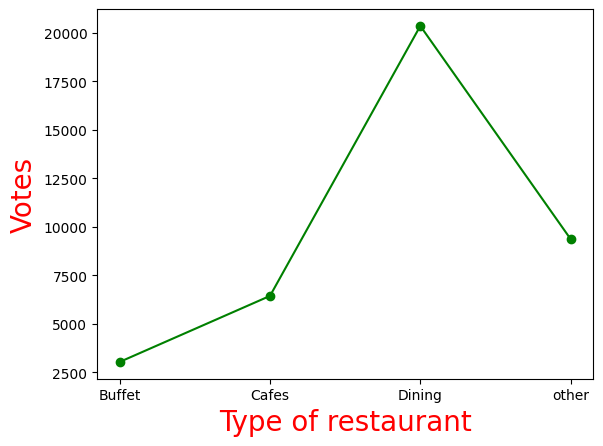

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


**CONCLUSION:** Dining restaurants are preferred by a larger number of individuals.

 Determining the restaurant’s name that has the maximum votes

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Exploring the online_order column

<Axes: xlabel='online_order', ylabel='count'>

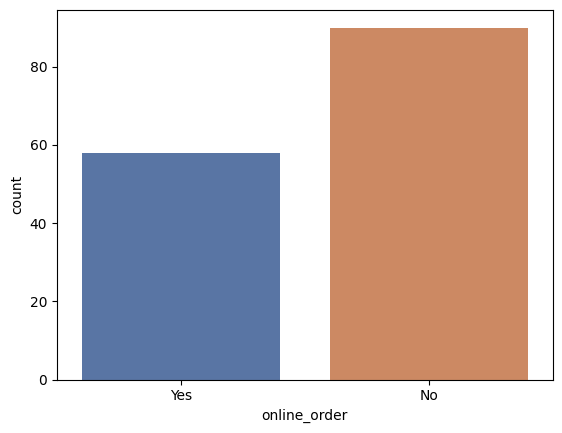

In [ ]:
sns.countplot(x=dataframe['online_order'], hue=dataframe['online_order'], palette='deep', legend=False)

**CONCLUSION:** Most restuarants do not accept online orders

Exploring the rate column

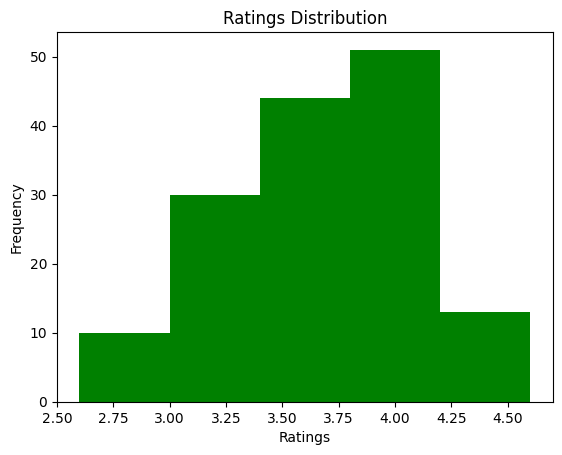

In [ ]:
plt.hist(dataframe['rate'],bins=5,color='green')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings Distribution")
plt.show()


**CONCLUSION:** The majority of restaurants received ratings ranging from 3.5 to 4.

Exploring the approx_cost(for two people) column

<ipython-input-31-4b421bd0b709>:3: UserWarning: 
The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=couple_data,hue=couple_data,palette=current_palette,legend=False)


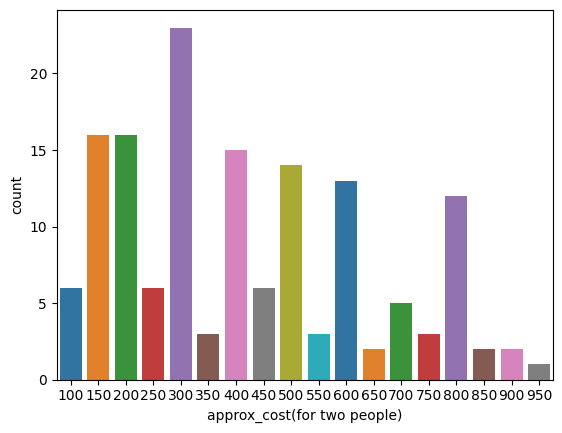

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
current_palette = sns.color_palette()
sns.countplot(x=couple_data,hue=couple_data,palette=current_palette,legend=False)
plt.show()


**CONCLUSION:** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

Examining whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

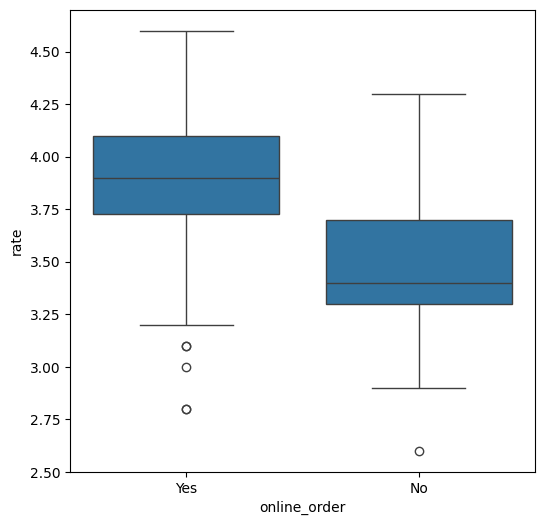

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


**CONCLUSION:** Offline orders received lower ratings in comparison to online orders

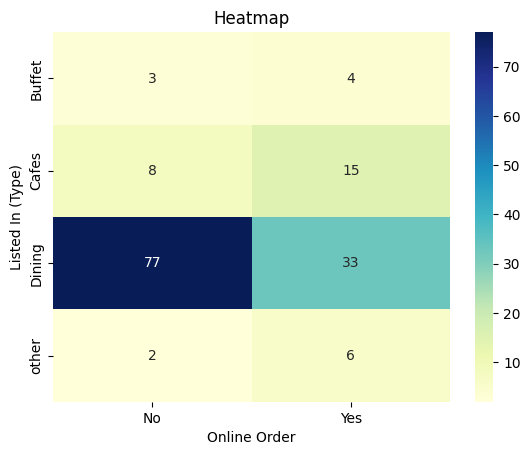

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


**CONCLUSION:** While cafes typically get online orders, dining establishments primarily take offline orders. This implies that customers prefer online ordering at cafes but in-person ordering at restaurants.